In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyse/prices-split-adjusted.csv
/kaggle/input/nyse/fundamentals.csv
/kaggle/input/nyse/prices.csv
/kaggle/input/nyse/securities.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../input/nyse/prices-split-adjusted.csv")
df = pd.DataFrame(data)

In [4]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [5]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [6]:
for i in df.columns:
    print(i, "\t-\t", df[i].isna().mean()*100)

date 	-	 0.0
symbol 	-	 0.0
open 	-	 0.0
close 	-	 0.0
low 	-	 0.0
high 	-	 0.0
volume 	-	 0.0


<AxesSubplot:>

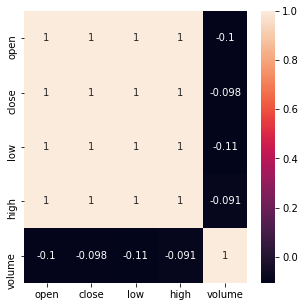

In [7]:
df = df[df['symbol'] == 'AAP']
cormap = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cormap, annot = True)

In [8]:
def get_corelated_col(cor_dat, threshold):
    feature = []
    value = []
    for i, index in enumerate(cor_dat.index):
        if abs(cor_dat[index]) > threshold:
            feature.append(index)
            value.append(cor_dat[index])
    df = pd.DataFrame(data = value, index = feature, columns = ['corr value'])
    return df


In [9]:
top_corelated_values = get_corelated_col(cormap['close'], 0.60)
top_corelated_values

,corr value
open,0.999382
close,1.000000
low,0.999615
high,0.999737


In [10]:
df = df[top_corelated_values.index]
df.head()

,open,close,low,high
253,40.700001,40.380001,40.360001,41.040001
720,40.299999,40.139999,39.720001,40.310001
1188,40.049999,40.490002,40.049999,40.779999
1656,39.549999,40.480000,39.549999,40.540001
2124,40.250000,40.639999,40.110001,40.820000


In [12]:
df.shape

(1762, 4)

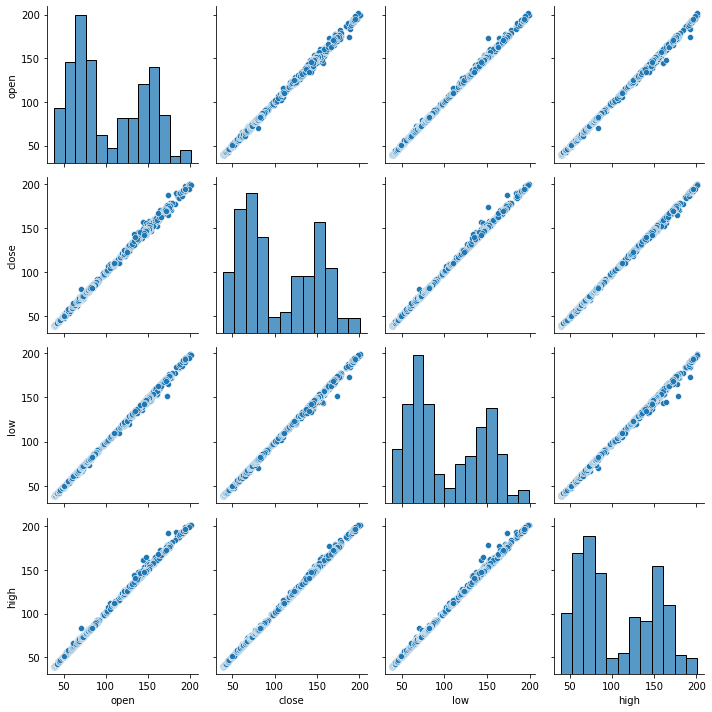

In [13]:
sns.pairplot(df)
plt.tight_layout()

In [14]:
X = df.drop(['close'], axis = 1)
y = df['close']

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)
X.head()

,open,low,high
0,0.012001,0.012392,0.010256
1,0.009539,0.008387,0.005746
2,0.008000,0.010452,0.008649
3,0.004923,0.007323,0.007167
4,0.009231,0.010827,0.008897


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)
Acc = []

In [20]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
675111,173.660004,173.682489
675608,171.919998,172.593759
676105,172.000000,171.182789
676602,187.789993,187.980305
677099,187.029999,188.440838


In [22]:
from sklearn.metrics import r2_score
print("Accuracy score of the predictions : {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions : 0.9931342019332019


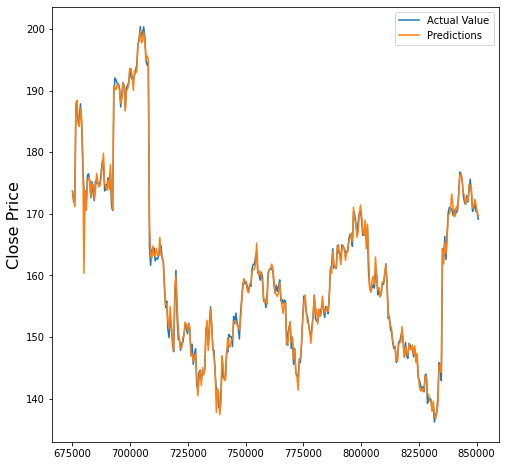

In [24]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize = 16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [25]:
# Model Creation

from keras.models import Sequential
from keras.layers import Dense

def regressor(inp_dim):
    
    model = Sequential()
    
    model.add(Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [26]:
model_2 = regressor(inp_dim=3)
model_2.fit(X_train, y_train, epochs=70, validation_split=0.2)

Epoch 1/70
36/36 [==============================] - 1s 16ms/step - loss: 6210.4027 - val_loss: 22082.9082
Epoch 2/70
36/36 [==============================] - 0s 3ms/step - loss: 6040.2906 - val_loss: 21988.4570
Epoch 3/70
36/36 [==============================] - 0s 3ms/step - loss: 6132.0979 - val_loss: 21571.5977
Epoch 4/70
36/36 [==============================] - 0s 3ms/step - loss: 5654.0984 - val_loss: 20267.6660
Epoch 5/70
36/36 [==============================] - 0s 3ms/step - loss: 5223.8398 - val_loss: 17316.7109
Epoch 6/70
36/36 [==============================] - 0s 3ms/step - loss: 4396.9789 - val_loss: 12286.3604
Epoch 7/70
36/36 [==============================] - 0s 3ms/step - loss: 2600.8214 - val_loss: 6236.6348
Epoch 8/70
36/36 [==============================] - 0s 3ms/step - loss: 990.0647 - val_loss: 1807.7416
Epoch 9/70
36/36 [==============================] - 0s 3ms/step - loss: 163.6675 - val_loss: 409.8147
Epoch 10/70
36/36 [==============================] - 0s 3ms/

In [27]:
y_pred_2 = model_2.predict(X_test)

In [28]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})
pred_df.head()

,Actual,Predicted
675111,173.660004,174.077057
675608,171.919998,172.394180
676105,172.000000,170.616135
676602,187.789993,179.494537
677099,187.029999,188.134720


In [29]:
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.9876911544243487


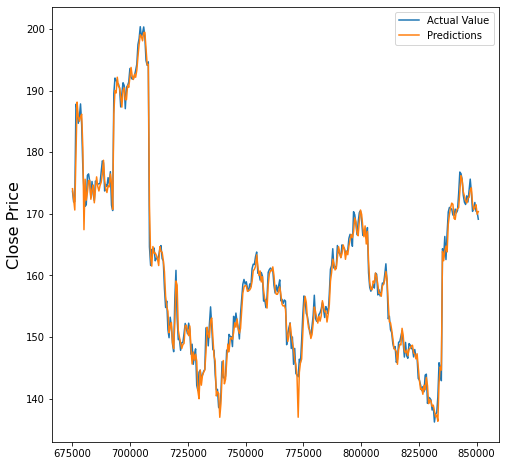

In [30]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [31]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [32]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

def reg():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [33]:
model_3 = reg()
model_3.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
36/36 [==============================] - 1s 10ms/step - loss: 5787.1609 - val_loss: 15279.5000
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: 2022.2449 - val_loss: 502.8342
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 37.6705 - val_loss: 5.9584
Epoch 4/100
36/36 [==============================] - 0s 5ms/step - loss: 1.3202 - val_loss: 2.6178
Epoch 5/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6539 - val_loss: 2.5109
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: 0.5564 - val_loss: 1.7764
Epoch 7/100
36/36 [==============================] - 0s 5ms/step - loss: 0.3879 - val_loss: 1.6475
Epoch 8/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4877 - val_loss: 1.6097
Epoch 9/100
36/36 [==============================] - 0s 4ms/step - loss: 0.4020 - val_loss: 1.6380
Epoch 10/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4000 - val_loss: 1.

In [34]:
# Prediction

y_pred_3 = model_3.predict(X_test)

In [35]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
675111,173.660004,175.369354
675608,171.919998,173.732269
676105,172.000000,171.916656
676602,187.789993,180.924377
677099,187.029999,189.646851


In [36]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.9852200858679908


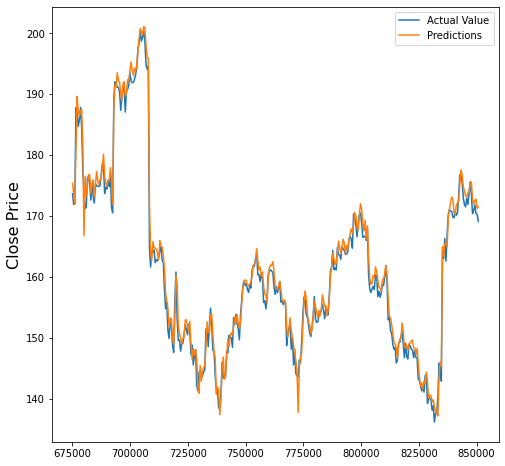

In [37]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

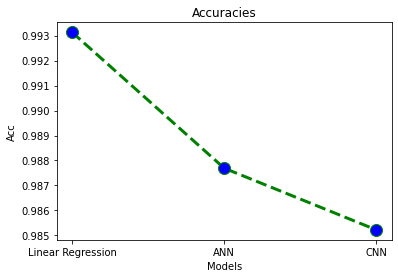

In [38]:
plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['Linear Regression', 'ANN', 'CNN'])
plt.show()

In [39]:
close = df.reset_index()['close']
close.head()

0    40.380001
1    40.139999
2    40.490002
3    40.480000
4    40.639999
Name: close, dtype: float64

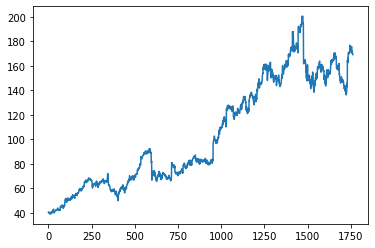

In [40]:
plt.plot(close)
plt.show()

In [41]:
time_step = 30
X, y = [], []

for i in range(len(close)-time_step-1):
    X.append(close[i:(i+time_step)])
    y.append(close[(i+time_step)])

X = np.array(X)
y = np.array(y)

In [42]:
X[:5]

array([[40.380001, 40.139999, 40.490002, 40.48    , 40.639999, 40.240002,
        39.540001, 40.09    , 39.560001, 39.310001, 39.5     , 39.16    ,
        39.23    , 39.740002, 40.5     , 40.549999, 40.59    , 39.77    ,
        39.450001, 40.490002, 41.189999, 41.189999, 40.93    , 40.720001,
        40.810001, 41.57    , 42.330002, 42.549999, 42.810001, 42.630001],
       [40.139999, 40.490002, 40.48    , 40.639999, 40.240002, 39.540001,
        40.09    , 39.560001, 39.310001, 39.5     , 39.16    , 39.23    ,
        39.740002, 40.5     , 40.549999, 40.59    , 39.77    , 39.450001,
        40.490002, 41.189999, 41.189999, 40.93    , 40.720001, 40.810001,
        41.57    , 42.330002, 42.549999, 42.810001, 42.630001, 42.880001],
       [40.490002, 40.48    , 40.639999, 40.240002, 39.540001, 40.09    ,
        39.560001, 39.310001, 39.5     , 39.16    , 39.23    , 39.740002,
        40.5     , 40.549999, 40.59    , 39.77    , 39.450001, 40.490002,
        41.189999, 41.189999, 40.93 

In [43]:


y[:5]



array([42.880001, 40.150002, 40.      , 40.240002, 40.220001])

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.007567,0.006079,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,...,0.007420,0.007420,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399
1,0.006079,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,...,0.007420,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957
2,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,...,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935
3,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,0.000434,...,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935,0.000000
4,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,0.000434,0.003598,...,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935,0.000000,0.001496


In [45]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

In [46]:
X_train_ = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_ = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [47]:
from tensorflow.keras.layers import LSTM

def Reg():
    model = Sequential()
    
    model.add(LSTM(70, return_sequences=True, input_shape=(30,1)))
    model.add(LSTM(70, return_sequences=True))
    model.add(LSTM(70))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [48]:
# Model Training

model_1 = reg()
model_1.fit(X_train_, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
35/35 [==============================] - 1s 16ms/step - loss: 5210.3954 - val_loss: 34.0569
Epoch 2/100
35/35 [==============================] - 0s 10ms/step - loss: 186.3675 - val_loss: 154.5325
Epoch 3/100
35/35 [==============================] - 0s 11ms/step - loss: 23.3148 - val_loss: 47.5399
Epoch 4/100
35/35 [==============================] - 0s 11ms/step - loss: 16.0261 - val_loss: 45.1104
Epoch 5/100
35/35 [==============================] - 0s 11ms/step - loss: 15.6852 - val_loss: 43.9583
Epoch 6/100
35/35 [==============================] - 0s 11ms/step - loss: 14.3283 - val_loss: 38.7855
Epoch 7/100
35/35 [==============================] - 0s 10ms/step - loss: 14.1237 - val_loss: 38.1656
Epoch 8/100
35/35 [==============================] - 0s 10ms/step - loss: 14.6410 - val_loss: 60.3568
Epoch 9/100
35/35 [==============================] - 0s 11ms/step - loss: 14.6481 - val_loss: 42.8763
Epoch 10/100
35/35 [==============================] - 0s 10ms/step - loss: 14.

In [49]:
y_pred_1 = model_1.predict(X_test_)

In [50]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.flatten()})
pred_df.head()

,Actual,Predicted
0,184.690002,181.331909
1,185.770004,183.783112
2,187.839996,185.451385
3,184.449997,186.891617
4,177.539993,187.429062


In [51]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.8946010717137711


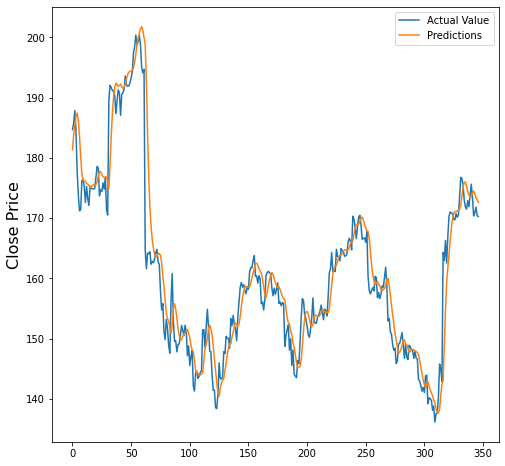

In [52]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [53]:
# Model Training

model_2 = regressor(inp_dim=30)
model_2.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
35/35 [==============================] - 1s 7ms/step - loss: 6212.5249 - val_loss: 22398.0703
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 6173.6924 - val_loss: 22051.3516
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 6015.8783 - val_loss: 20057.8496
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 5344.0716 - val_loss: 13758.9062
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 3812.7772 - val_loss: 3148.1335
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 1209.8824 - val_loss: 720.6298
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 234.6946 - val_loss: 1755.2927
Epoch 8/100
35/35 [==============================] - 0s 3ms/step - loss: 242.5639 - val_loss: 1435.1635
Epoch 9/100
35/35 [==============================] - 0s 3ms/step - loss: 214.5011 - val_loss: 1438.3912
Epoch 10/100
35/35 [==============================] - 0

In [54]:
# Prediction

y_pred_2 = model_2.predict(X_test)

In [55]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.8004984559504255


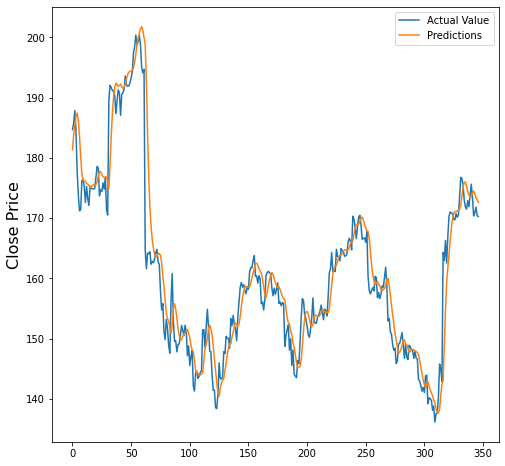

In [56]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [57]:
# Model Training

model_3 = reg()
model_3.fit(X_train_, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
35/35 [==============================] - 1s 15ms/step - loss: 4880.7076 - val_loss: 678.6934
Epoch 2/100
35/35 [==============================] - 0s 10ms/step - loss: 198.5081 - val_loss: 142.0825
Epoch 3/100
35/35 [==============================] - 0s 10ms/step - loss: 23.1880 - val_loss: 43.3402
Epoch 4/100
35/35 [==============================] - 0s 11ms/step - loss: 15.4916 - val_loss: 34.4695
Epoch 5/100
35/35 [==============================] - 0s 10ms/step - loss: 18.4602 - val_loss: 32.8682
Epoch 6/100
35/35 [==============================] - 0s 10ms/step - loss: 14.8704 - val_loss: 37.1422
Epoch 7/100
35/35 [==============================] - 0s 10ms/step - loss: 15.9561 - val_loss: 31.8181
Epoch 8/100
35/35 [==============================] - 0s 10ms/step - loss: 16.1975 - val_loss: 38.5882
Epoch 9/100
35/35 [==============================] - 0s 12ms/step - loss: 15.8261 - val_loss: 32.2073
Epoch 10/100
35/35 [==============================] - 0s 10ms/step - loss: 15

In [58]:

y_pred_3 = model_3.predict(X_test_)

In [59]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
0,184.690002,187.696594
1,185.770004,186.657608
2,187.839996,188.197144
3,184.449997,190.036072
4,177.539993,188.585907


In [60]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.9185331097379048


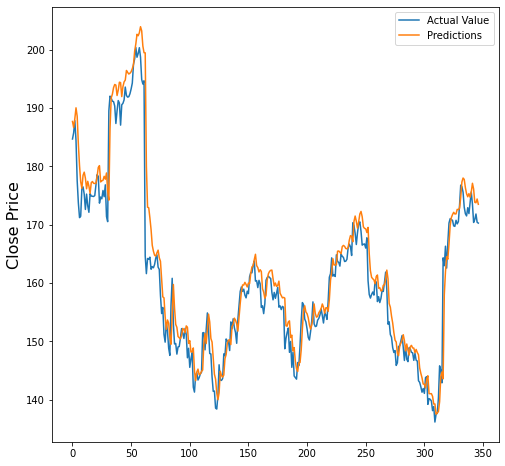

In [61]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

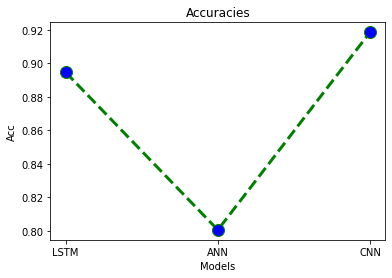

In [62]:
plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['LSTM', 'ANN', 'CNN'])
plt.show()